# Cleaning Chicago Crime Data

I have downloaded the dataset from [the City of Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2). The data includes all crime information occurred in Chicago since 2001 AND recorded by CPD's CLEAR (Citizen Law Enforcement Analysis and Reporting) system. The data is broken down by factors such as time, crime id, offense type, arrest, and crime location. 

The end purpose of this notebook is to fully clean the data, possibly by developing a pipeline, and to reduce difficulties in future analysis and visualization. This outcome is achieved through three steps: in step 1, we condense the dataset by truancating crimes that happened before 2015; in step 2, we clean the simplified data by transforming variable types, deselecting unnecessary information, and ...(to be filled), and lastly, in step 3, we produce summary tables and graphs. 


## Step 0: Loading libraries

We will use `json` and `requests` for basic data gathering, `pandas` and `numpy` for data cleaning and wrangling, and `matplotlib` and `seaborn` for visualization.

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

## Part I: Initial Data Cleaning

Before moving to any analysis, I need to cut out the data size to only include data from year 2015 in order to be consistent with the time frame in other data of this project. To do that, I filtered the data by variable `Year` and save the new, filtered dataset in the `data` subdirectory.

In [2]:
crime_all_data = pd.read_csv("Crimes_2001_to_Present.csv")

c:\Users\liu00\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Our dataframe has over 7M data and 20+ variables!! Thinking about the space needed to store these 7M data, this is clearly too many rows. With this large data size, transforming the data will also be very time-consuming. We surely don't want to spend hours waiting for the codes to run, right? We thus need to reduce the dimension by filtering out data that is out of scope of our analysis.

In [4]:
crime_all_data.shape

(7642176, 22)

In [9]:
crime_all_data[crime_all_data.Year >= 2015].to_csv("data/crimes_from_2015.csv", index= False)

## Part II Data Cleaning and Wrangling

After getting the dataset that has gone through dimension reduction steps, now is a great time to peak at our data! What information does the data provide? How many people were arrested during the time frame? Which year has the most crimes in Chicago? What's the most occurred crime type? Which police district had the most crimes and arrests? These are just some of the many questions we can think of.

But first, let's look at our data! What are these 22 variables? We use the first 10 rows to grasp a sense of what our data looks like.

In [26]:
crimes = pd.read_csv("data/crimes_from_2015.csv")

c:\Users\liu00\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Our data now has 1.9M rows. This is 3/4 down from the original dataset

In [29]:
crimes.shape

(1923350, 22)

In [13]:
crimes.head(5)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
5,10224742,HY411435,09/05/2015 10:55:00 AM,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,05,1168430.0,1850165.0,2015,02/10/2018 03:50:01 PM,41.744379,-87.658431,"(41.744378879, -87.658430635)"
6,10224743,HY411629,09/04/2015 06:00:00 PM,021XX W CHURCHILL ST,0620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,32.0,24.0,05,1161628.0,1912157.0,2015,02/10/2018 03:50:01 PM,41.914636,-87.681631,"(41.914635603, -87.681630909)"
7,10224744,HY411605,09/05/2015 01:00:00 PM,025XX W CERMAK RD,0860,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,...,25.0,31.0,06,1159734.0,1889313.0,2015,09/17/2015 11:37:18 AM,41.851989,-87.689219,"(41.851988885, -87.689219118)"
8,10224745,HY411654,09/05/2015 11:30:00 AM,031XX W WASHINGTON BLVD,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,True,...,27.0,27.0,03,1155536.0,1900515.0,2015,02/10/2018 03:50:01 PM,41.882814,-87.704326,"(41.88281374, -87.704325717)"
9,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN


The 22 variables can be roughly grouped into a few categories:

| Category | Variables Belong to this Category|
| ------ | ------------------------|
| Crime| ID, Case Number |
| Crime Type and Info | IUCR, Primary Type, Description, Arrest, Domestic, FBI Code
| Time| Date, Year, Updated On|
| Location| Block, Location Description, Ward, Community Area|
| Police Area| Beat, District|
| Geographic Location| X Coordinate, Y Coordinate, Longitude, Latitude, Location|

These 22 variables own 4 data types: int65 (representing integer), (Pandas) object (this is pandas' way of calling strings, i.e. words), bool (booleans, i.e. T/F), and float (numbers with decimals). 

In [17]:
crimes.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

As we are able to tell from the table above, there are a lot of overlaps on the information in each category. For example, `IUCR` and `FBI Code` represent the same type of crime but under distinct crime classification systems (IUCR stands for Illinois Uniform Crime Report), for which we can pick one of them. Similarily, `block`, `ward`, and `community areas` represent the same location on different scales. Moreover, some variables are related. For instance, because variables `primary type` and `description` are both explanations to the IUCR code, we can use the former twp to replace the latter, which gives us a more intuitive sense of the crime that corresponds to the case number. With this being known, within each category, we only need to pick variables that best characterize the information. These variables are:
  
| Category | Variables Belong to this Category|
| ------ | ------------------------|
| Crime| Case Number |
| Crime Type and Info |Primary Type, Description, Arrest, Domestic|
| Time| Date, Year|
| Location| Location Description, Ward, Community Area|
| Police Area| Beat, District|
| Geographic Location|Longitude, Latitude|

In [34]:
crime = crimes.drop(["ID", "FBI Code", "Location", "Block", "IUCR", "Updated On", "X Coordinate", "Y Coordinate"], axis = 1)

crime.head(5)

,Case Number,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude
0,HY411648,09/05/2015 01:30:00 PM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,2015,41.815117,-87.670000
1,HY411615,09/04/2015 11:30:00 AM,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,2015,41.895080,-87.765400
2,JC213529,09/01/2018 12:01:00 AM,THEFT,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,2018,NaN,NaN
3,HY411595,09/05/2015 12:45:00 PM,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,2015,41.937406,-87.716650
4,HY411610,09/05/2015 01:00:00 PM,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,2015,41.881903,-87.755121
5,HY411435,09/05/2015 10:55:00 AM,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,2015,41.744379,-87.658431
6,HY411629,09/04/2015 06:00:00 PM,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,1434,14.0,32.0,24.0,2015,41.914636,-87.681631
7,HY411605,09/05/2015 01:00:00 PM,THEFT,RETAIL THEFT,GROCERY FOOD STORE,True,False,1034,10.0,25.0,31.0,2015,41.851989,-87.689219
8,HY411654,09/05/2015 11:30:00 AM,ROBBERY,STRONGARM - NO WEAPON,STREET,False,True,1222,12.0,27.0,27.0,2015,41.882814,-87.704326
9,JC212333,05/01/2016 12:25:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,2016,NaN,NaN


Now we are ready to do two things: change the types of some variables and inspect missing values (NaN). These two steps are important for our analysis because it boosts our familiarity with data.

Let's start with looking at which columns have missing values (NAs). We found out around 10% of longitudes and latitudes are not entered to the database, which may be a drawback when we create geospatial visualizations. Around 0.4% of location description is also missing. We can ignore them at this moment because from a statisical standpoint, a small share of missing values affects little on the statistical powers of our analysis (in the context of regressions, deleting this 0.4% percent won't make our hypothese testing less valid). There are also some missing values across variables `District`, `Ward`, and `Community Area`, which we can feel safe to treat them with the complete case approach (i.e. taking out the missing data).       


In [42]:
crime.isna().sum()

Case Number                  0
Date                         0
Primary Type                 0
Description                  0
Location Description      8024
Arrest                       0
Domestic                     0
Beat                         0
District                     1
Ward                        51
Community Area               1
Year                         0
Latitude                198683
Longitude               198683
dtype: int64

In [44]:
crime = crime.dropna(subset=['Ward', 'District', 'Community Area'])
crime.isna().sum()

# not drop any values; figure out what the missing district is

Case Number                  0
Date                         0
Primary Type                 0
Description                  0
Location Description      8024
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                         0
Community Area               0
Year                         0
Latitude                198673
Longitude               198673
dtype: int64

Next, we focus on converting variable types. This is comprised with three substeps: first, we convert `District`, `Ward`, and `Community Area` to integers; second, we make variable `Date` a datetime object, which is a date/time-specific type in Python.  

Let's start with the first step. Because there are multiple variables that need to be transformed, we apply a for-loop here. 

In [45]:
for i in [8, 9, 10]:
   crime.iloc[:,i] = crime.iloc[:, i].astype(int)

In [47]:
#for j in [0,1,2,3,4, 7, 8, 9, 10, 11]:
#    crime.iloc[:,j] = crime.iloc[:,j].astype(str)

Now the second step:

In [50]:
crime.loc[:,"Date"] = pd.to_datetime(crime["Date"], infer_datetime_format=True)

With another look of eyes, we are sure that all variables are in the right format. We are ready to move forward! How exciting!

In [51]:
crime.dtypes

Case Number                     object
Date                    datetime64[ns]
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                            object
District                        object
Ward                            object
Community Area                  object
Year                            object
Latitude                       float64
Longitude                      float64
dtype: object

In [ ]:
crime.to_csv("data/cleaned_crimes_from_2015.csv", index=False)

In [ ]:
crime.to_pickle("data/cleaned_crimes_from_2015.pkl")

## Part III: Explorative Data Analysis:

Now it's finally the time to answer our questions posed in part II. We first load our cleaned dataset to the notebook. Because the data has 16 variables, there are a lot of questions that can be asked. I will center around questions that are of the most interests to me and probably add more later on, should the need arise. 

The section is structured around questions, and for each one, I will try to use a combination of table and graphics to answer.

In [ ]:
crime = pd.read_pickle("data/cleaned_crimes_from_2015.pkl")

### *Q1: Which year has the most crimes?*

Crime has been decreasing since the 90s and remaining relatively steady since mid-2000s. This broad trend speaks to both national and local levels (Chicago included). However, this is not to say crime number was the same for every year. In fact, on a micro time scale, such as a few months, 1 year, or 3 years, fluctuations arose in nearly all cities (changes over a few years can not be called trend, which must be established on a longer scale). How has the level of criminal activity changed in Chicago since 2015? This is a question that is very concerning to me.

As we can tell from the following table and graph, there were some minor variations on the total number of crimes in Chicago between 2015 and 2018, but overall, criminal activities were steady during this period, not a lot of increase nor decrease. Between 2018 and 2019, there was a 3 percent drop in crime numbers (or a reduction of 7557 crimes). The negative trend continuted after 2019, and the decrease was the highest between 2019 and 2020 (a 18.5% shrink within this time frame). 

A few reasons might contribute to this explanation. First is that in 2020, the noval COVID-19 virus broke out in the US, and Chicago was among the most affected areas. Following the coronavarius, the government issued the quarantine order, which encouraged people to reduce their outdoor actvities. When criminals were out of the street, criminal activies decreased consequentially. The trent whereas started in 2019, the year before the inciden, which is interesting. It is worth the time of the client to investigate what happened in 2019 that led to the trend. 

It is also possible, although to a less degree, that there was a change to CPD's CLEAR system, for example, there might have been an update to the system or that some crimes were codes in a new way, which caused the declination. Future investigation is needed should the time allows.

In [108]:
count_by_year = crime.loc[:, "Year"].value_counts().sort_index(ascending=True).to_frame()
count_by_year = count_by_year.reset_index()
count_by_year.columns = ["Year", "Crime Counts"]
count_by_year

,Year,Crime Counts
0,2015,264698
1,2016,269751
2,2017,268984
3,2018,268667
4,2019,261110
5,2020,211881
6,2021,207872
7,2022,170335


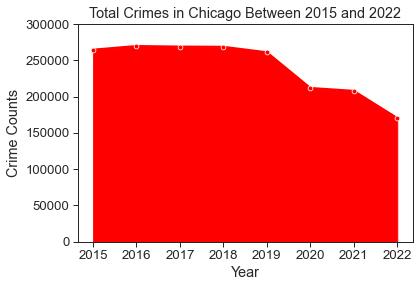

In [184]:
sns.set_context("paper", font_scale = 1.5)
sns.set_style("ticks")
p = sns.lineplot(x = "Year", y = "Crime Counts", data = count_by_year, marker = "o", color = "red", linewidth=2)
p.set(ylim = [0, 300000], title = "Total Crimes in Chicago Between 2015 and 2022")
plt.stackplot("Year", "Crime Counts", data = count_by_year, color = "red")

### *Q2: Which type of crime was the most common? Which was the least?*

Different crimes could be roughly divided into four categories: violent crimes, property crimes, crimes against public order, and others (misdemeanors and felonies utilize another classification system). There are other ways to classify crimes as well. For example, the well-known term "index crime", frequentially used by the FBI and other law enforcement agencies, refer to a series of crimes including murder, aggrevated assaults, rape, arsons, motor vehicle theft, bulgary, robberies, and larceny, which collectively, represent the most heinous and serious crimes. The eight categories above contain both violent crimes and property crimes and the overlapping of both. What was the most committed crimes in Chicagoland since 2015? Let's take a look.

By ranking all primary types of crimes according to their case counts, we found out that theft, battery, and criminal damage were the top-three most-occurred crimes, which in total represented over 50% of all crimes happened in Chicago during the period. Narcotics, drug-related offenses, was at the 6th place with 93098 counts. Homicide was at the 17th place with 5209 cases. 

We should be cautious in explaining our findings here for a few reasons. One is that Chicago Police Department coded crimes slightly differently than the FBI. For instance, the term "assault" represents both low-level assaults, which is usually misdemeanors, and aggrevated assaults, where bodily harms were often inflicted on the victims. The indistinction between these two types might pose important policy problems given how they differ legally. 

Moroever, we should be clear that the numbers illustrated what had been reported to the police, not what had really happened. Offense, especially sexual offenses and sexual batteries, were mostly unreported due to social embrassment and other reasons. Therefore, for a lot of crime types below, the real number might be even higher. 

Lastlt, a few groups, such as `CRIM SEXUAL ASSAULT` and `CRIMINAL SEXUAL ASSAULT`, refer to the same type of crime but under different categories. For a fully cleaned dataset that is published on the agency's offical website, the issue is less likely to be caused by negiligence of people who entered the data to the system (not impossible) and more likely to infer changes in the department's coding system. The specific reason behind repeated categories may need deeper investigations. 

In [144]:
count_by_type = crime.loc[:, "Primary Type"].value_counts(ascending=False).to_frame()
count_by_type = count_by_type.reset_index()
count_by_type.columns = ["Type", "Crime Counts"]
count_by_type

# dictionary to make new variables

,Type,Crime Counts
0,THEFT,432786
1,BATTERY,360695
2,CRIMINAL DAMAGE,212646
3,ASSAULT,150235
4,DECEPTIVE PRACTICE,139787
5,OTHER OFFENSE,123634
6,NARCOTICS,93098
7,MOTOR VEHICLE THEFT,84547
8,BURGLARY,82726
9,ROBBERY,73141


### *Q3: Which police district faced the most crimes since 2015? Which district was the safest?*

In [127]:
count_by_district = crime.loc[:, "District"].value_counts(ascending=False).to_frame()
count_by_district = count_by_district.reset_index()
count_by_district.columns = ["Police District", "Crime Counts"]
count_by_district

,Police District,Crime Counts
0,11,132269
1,6,120459
2,8,120079
3,4,108570
4,7,101710
5,25,100712
6,1,99354
7,18,99215
8,12,97328
9,3,92991


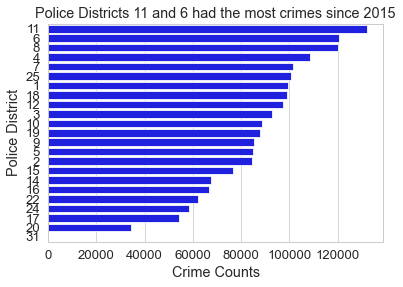

In [137]:
sns.set_style("whitegrid")
sns.barplot(y = "Police District", x = "Crime Counts", data = count_by_district, orient = "h", color = "b", order=count_by_district.sort_values('Crime Counts', ascending = False).loc[:, "Police District"]).set(title = "Police Districts 11 and 6 had the most crimes since 2015")
plt.xlabel = ""


### *Q4: Where crime usually occurred?*

In [153]:
count_by_loc = crime.loc[:, "Location Description"].value_counts(ascending=False).to_frame()
count_by_loc = count_by_loc.reset_index()
count_by_loc.columns = ["Location", "Crime Counts"]
count_by_loc

,Location,Crime Counts
0,STREET,446237
1,RESIDENCE,315386
2,APARTMENT,286990
3,SIDEWALK,148428
4,OTHER,56004
...,...,...
191,LAKE,1
192,POLICE FACILITY,1
193,ROOMING HOUSE,1
194,YMCA,1


c:\Users\liu00\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


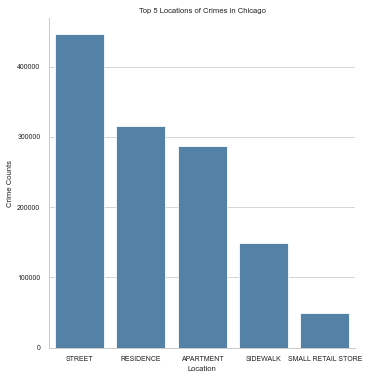

In [181]:
sns.set_context("paper", font_scale = .8)
sns.set_style("whitegrid")
sns.catplot("Location", "Crime Counts", data= count_by_loc.iloc[[0,1,2,3,5],:], kind = "bar", color = "steelblue").set(title = "Top 5 Locations of Crimes in Chicago")
plt.xlabel = ""

In [169]:
count_by_loc.iloc[0:5,:]
#sum(count_by_loc.iloc[0:4,1])
#sum(count_by_loc.iloc[:,1])
#sum(count_by_loc.iloc[0:8,1])/sum(count_by_loc.iloc[:,1])

,Location,Crime Counts
0,STREET,446237
1,RESIDENCE,315386
2,APARTMENT,286990
3,SIDEWALK,148428
4,OTHER,56004
